In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

YOLOV8m

In [1]:
# 1. Install Ultralytics library
!pip install ultralytics --quiet

# 2. Import required modules
from ultralytics import YOLO
import os

# 4. Set dataset path (adjust this to your actual dataset location)
dataset_path = '/kaggle/input/yolov8/pallet detection.v1i.yolov8'

# 5. Create the data.yaml file programmatically
yaml_path = '/kaggle/working/data.yaml'
yaml_content = f"""
path: {dataset_path}
train: train/images
val: valid/images
test: test/images

names:
  0: pallet
"""

with open(yaml_path, 'w') as f:
    f.write(yaml_content)

# 6. Load YOLOv8m model (you can use yolov8n.pt or yolov8l.pt for different sizes)
model = YOLO('yolov8m.pt')  # Loads pre-trained YOLOv8m model


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is inco

100%|██████████| 49.7M/49.7M [00:00<00:00, 54.5MB/s]


In [3]:

# 7. Train the model
model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=8,
    project='pallet_detection_project',
    name='yolov8m_run',
    exist_ok=True
)


Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

train: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/train/labels... 3119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3119/3119 [00:07<00:00, 434.31it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.2±0.4 ms, read: 74.3±12.9 MB/s, size: 80.1 KB)


val: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:01<00:00, 196.32it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/valid is not writeable, cache not saved.


Plotting labels to pallet_detection_project/yolov8m_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to pallet_detection_project/yolov8m_run
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.72G     0.9156     0.5901      1.017        368        640: 100%|██████████| 390/390 [02:23<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        200       7030      0.887      0.982      0.925      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.76G     0.9091     0.5766      1.011        404        640: 100%|██████████| 390/390 [02:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.16it/s]

                   all        200       7030       0.89       0.99      0.929       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.76G     0.8679     0.5277     0.9815        485        640: 100%|██████████| 390/390 [02:19<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        200       7030      0.872      0.977      0.944      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.76G     0.8323     0.4947     0.9643        288        640: 100%|██████████| 390/390 [02:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        200       7030      0.915      0.986       0.97      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.76G     0.7928     0.4605     0.9459        232        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.894      0.989       0.94       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.76G     0.7549     0.4373     0.9335        242        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        200       7030      0.891      0.989       0.92       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.76G     0.7331     0.4233     0.9246        362        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]

                   all        200       7030      0.889       0.99      0.915      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.76G     0.7195     0.4087     0.9187        223        640: 100%|██████████| 390/390 [02:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        200       7030      0.906      0.987      0.957      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.76G     0.6985     0.3908      0.914        315        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        200       7030      0.874      0.983      0.911      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.76G     0.6916      0.386     0.9098        271        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        200       7030      0.898      0.983      0.957      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.76G     0.6705     0.3762     0.9006        255        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        200       7030      0.879      0.987      0.882      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.76G     0.6648     0.3684     0.8999        296        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        200       7030      0.887       0.99      0.911      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.76G     0.6433     0.3537     0.8908        292        640: 100%|██████████| 390/390 [02:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        200       7030      0.882      0.986      0.912      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.76G     0.6364      0.351     0.8899        407        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.912      0.984      0.962      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.76G     0.6273     0.3415     0.8874        184        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        200       7030      0.888      0.993      0.951      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.76G     0.6146     0.3347     0.8867        291        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.894      0.989      0.965      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.76G     0.5998     0.3285     0.8812        228        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        200       7030       0.89      0.987      0.941      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.76G     0.5973     0.3237     0.8809        450        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.898      0.986      0.969      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.76G     0.5811     0.3169     0.8765        383        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        200       7030      0.888      0.986      0.953      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.76G     0.5613     0.3065     0.8728        349        640: 100%|██████████| 390/390 [02:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]

                   all        200       7030      0.889      0.993      0.948      0.755


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.76G     0.5479     0.3093      0.861        238        640: 100%|██████████| 390/390 [02:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.885      0.987      0.911      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.76G     0.5402     0.3039     0.8592         63        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030      0.896      0.989      0.913      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.76G     0.5164     0.2893     0.8487        184        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        200       7030       0.89       0.99      0.899      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.76G     0.4968     0.2759     0.8458        259        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        200       7030      0.894      0.991      0.924      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.76G     0.4783     0.2671     0.8436        212        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]

                   all        200       7030       0.89      0.989       0.96      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.76G      0.468     0.2613     0.8398        296        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        200       7030       0.89      0.989      0.961      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.76G     0.4521     0.2523      0.839        227        640: 100%|██████████| 390/390 [02:17<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]

                   all        200       7030       0.89      0.989      0.957      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.76G     0.4455     0.2466     0.8361        124        640: 100%|██████████| 390/390 [02:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.28it/s]

                   all        200       7030      0.887      0.993      0.945      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.76G     0.4285     0.2372     0.8341        292        640: 100%|██████████| 390/390 [02:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        200       7030      0.888      0.991      0.934      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.76G     0.4172      0.232     0.8312        114        640: 100%|██████████| 390/390 [02:16<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]

                   all        200       7030      0.889      0.993      0.938      0.773



30 epochs completed in 1.185 hours.
Optimizer stripped from pallet_detection_project/yolov8m_run/weights/last.pt, 52.0MB
Optimizer stripped from pallet_detection_project/yolov8m_run/weights/best.pt, 52.0MB

Validating pallet_detection_project/yolov8m_run/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


                   all        200       7030      0.894      0.989      0.965      0.792


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to pallet_detection_project/yolov8m_run


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca6c6c991d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [4]:
# 8. Evaluate model on the test set
metrics = model.val(data=yaml_path, split='test')  # Runs validation on test images
print(f"\n✅ mAP@50 on test set: {metrics.box.map50:.4f}")
print(f"✅ mAP@50-95 on test set: {metrics.box.map:.4f}")

# 9. Predict on test images and save results
results = model.predict(
    source=os.path.join(dataset_path, 'test/images'),  # Test images folder
    conf=0.25,
    save=True,  # Save results (bounding boxes, labels)
    name='predict_test'
)

# 10. Visualize first 10 annotated test predictions
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Path where predictions are saved
pred_dir = Path('runs/detect/predict_test')
annotated_imgs = sorted(pred_dir.glob("*.jpg"))[:10]  # Get first 10 images

plt.figure(figsize=(15, 15))
for idx, img_path in enumerate(annotated_imgs):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 2, idx + 1)
    plt.imshow(img)
    plt.title(img_path.name)
    plt.axis("off")
plt.tight_layout()
plt.show()


Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.8±0.4 MB/s, size: 67.7 KB)


val: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:01<00:00, 196.19it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]


                   all        200       5180      0.949      0.979      0.976      0.843


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.9ms preprocess, 12.4ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to pallet_detection_project/yolov8m_run

✅ mAP@50 on test set: 0.9758
✅ mAP@50-95 on test set: 0.8426

image 1/200 /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/images/OIP-35-_jpg.rf.bbde643a09fc7b2b9305d5ad06540150 (10).jpg: 640x640 44 pallets, 14.8ms
image 2/200 /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/images/OIP-35-_jpg.rf.bbde643a09fc7b2b9305d5ad06540150 (2).jpg: 640x640 44 pallets, 14.9ms
image 3/200 /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/images/OIP-35-_jpg.rf.bbde643a09fc7b2b9305d5ad06540150 (3).jpg: 640x640 44 pallets, 14.9ms
image 4/200 /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/images/OIP-35-_jpg.rf.bbde643a09fc7b2b9305d5ad06540150 (4).jpg: 640x640 44 pallets, 14.8ms
image 5/200 /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/images/OIP-35-_jpg.rf.bbde643a09fc7b2b9305d5ad06540150 (5).jpg: 640x640 44 pallets, 14.9ms
image 6/200 /k

<Figure size 1500x1500 with 0 Axes>

YOLOV8s

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6.3 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [13]:
from ultralytics import YOLO


In [14]:
yaml_content = """
path: /kaggle/input/yolov8/pallet detection.v1i.yolov8

train: train/images
val: valid/images

nc: 1
names: ['pallet']
"""

with open("pallet.yaml", "w") as f:
    f.write(yaml_content)


In [15]:
model = YOLO("yolov8s.pt")

model.train(
    data="pallet.yaml",
    epochs=30,
    imgsz=640,
    batch=8,
    name="pallet_yolov8s"
)

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pallet.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pallet_yolov8s4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/train/labels... 3119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3119/3119 [00:06<00:00, 468.25it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.5±1.2 ms, read: 61.9±31.1 MB/s, size: 80.1 KB)


val: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 217.60it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/pallet_yolov8s4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/pallet_yolov8s4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.9G       1.19     0.8889       1.16        368        640: 100%|██████████| 390/390 [01:18<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.37it/s]

                   all        200       7030      0.915      0.979      0.948      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.92G     0.9243     0.6004     0.9941        404        640: 100%|██████████| 390/390 [01:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.60it/s]

                   all        200       7030       0.87       0.99       0.89      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.92G     0.8864     0.5519     0.9716        485        640: 100%|██████████| 390/390 [01:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.53it/s]

                   all        200       7030       0.91       0.98      0.937      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.92G     0.8459     0.5243     0.9557        288        640: 100%|██████████| 390/390 [01:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.90it/s]

                   all        200       7030      0.904       0.99      0.913      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.92G     0.8068     0.4841     0.9372        232        640: 100%|██████████| 390/390 [01:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.50it/s]

                   all        200       7030      0.894      0.987      0.929      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.92G     0.7737     0.4653     0.9266        242        640: 100%|██████████| 390/390 [01:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.81it/s]

                   all        200       7030      0.924      0.986      0.962      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.92G     0.7596     0.4516     0.9232        362        640: 100%|██████████| 390/390 [01:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.71it/s]

                   all        200       7030      0.883      0.986      0.938      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.92G     0.7316     0.4268     0.9117        223        640: 100%|██████████| 390/390 [01:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.82it/s]

                   all        200       7030      0.903       0.97      0.939       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.92G     0.7185     0.4147      0.909        315        640: 100%|██████████| 390/390 [01:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.65it/s]

                   all        200       7030      0.896      0.986      0.938      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.92G     0.7048     0.4121     0.9044        271        640: 100%|██████████| 390/390 [01:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.79it/s]

                   all        200       7030      0.915      0.987      0.961      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.92G     0.6935     0.3992     0.8979        255        640: 100%|██████████| 390/390 [01:15<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.88it/s]

                   all        200       7030      0.877      0.986      0.887      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.92G     0.6878      0.393     0.8982        296        640: 100%|██████████| 390/390 [01:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        200       7030      0.903      0.986      0.933      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.92G     0.6664     0.3794     0.8892        292        640: 100%|██████████| 390/390 [01:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.79it/s]

                   all        200       7030      0.937      0.993      0.966      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.92G     0.6585     0.3729     0.8876        407        640: 100%|██████████| 390/390 [01:16<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.95it/s]

                   all        200       7030      0.907       0.99      0.964      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.92G      0.653     0.3716     0.8877        184        640: 100%|██████████| 390/390 [01:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.61it/s]

                   all        200       7030      0.905      0.987      0.968       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.21G     0.6492     0.3644     0.8864        291        640: 100%|██████████| 390/390 [01:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.84it/s]

                   all        200       7030      0.905       0.99      0.969      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.21G     0.6256     0.3519     0.8811        228        640: 100%|██████████| 390/390 [01:15<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.92it/s]

                   all        200       7030      0.904      0.987      0.945      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.21G     0.6227     0.3484     0.8808        450        640: 100%|██████████| 390/390 [01:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.90it/s]

                   all        200       7030      0.916       0.99      0.973      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.21G     0.6044     0.3397     0.8756        383        640: 100%|██████████| 390/390 [01:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.73it/s]

                   all        200       7030      0.909      0.993      0.958      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.21G     0.5919      0.333     0.8729        349        640: 100%|██████████| 390/390 [01:15<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.58it/s]

                   all        200       7030        0.9       0.99      0.963      0.746


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.21G     0.5708     0.3286     0.8635        238        640: 100%|██████████| 390/390 [01:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.92it/s]

                   all        200       7030      0.906       0.99      0.951      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.21G      0.564     0.3224     0.8611         63        640: 100%|██████████| 390/390 [01:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]

                   all        200       7030      0.889       0.99       0.94       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.21G     0.5373     0.3079     0.8528        184        640: 100%|██████████| 390/390 [01:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.06it/s]

                   all        200       7030      0.908      0.989      0.936      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.21G     0.5206     0.2971     0.8503        259        640: 100%|██████████| 390/390 [01:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.03it/s]

                   all        200       7030      0.899      0.993      0.939      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.21G     0.5056     0.2887     0.8492        212        640: 100%|██████████| 390/390 [01:10<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]

                   all        200       7030      0.901      0.993      0.958      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.21G     0.4933      0.283     0.8446        296        640: 100%|██████████| 390/390 [01:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.02it/s]

                   all        200       7030       0.92      0.993      0.963      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.21G     0.4752     0.2715     0.8427        227        640: 100%|██████████| 390/390 [01:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.01it/s]

                   all        200       7030      0.913      0.991      0.962      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.21G       0.47     0.2682     0.8406        124        640: 100%|██████████| 390/390 [01:10<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.63it/s]

                   all        200       7030      0.904       0.99      0.944      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.21G     0.4513       0.26     0.8384        292        640: 100%|██████████| 390/390 [01:11<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]

                   all        200       7030      0.903      0.994      0.953      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.21G     0.4399     0.2544     0.8353        114        640: 100%|██████████| 390/390 [01:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.50it/s]

                   all        200       7030      0.909      0.994      0.955      0.769



30 epochs completed in 0.640 hours.
Optimizer stripped from runs/detect/pallet_yolov8s4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/pallet_yolov8s4/weights/best.pt, 22.5MB

Validating runs/detect/pallet_yolov8s4/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


                   all        200       7030      0.905       0.99      0.969      0.775


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/pallet_yolov8s4


Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca5f3cccf10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:

from ultralytics import YOLO

# Load the best model
model = YOLO("/kaggle/working/runs/detect/pallet_yolov8s/weights/best.pt")

# Evaluate on test split
metrics = model.val(data="/kaggle/input/yolov8/pallet detection.v1i.yolov8/data.yaml", split="test")

# Access values from the results_dict safely
results = metrics.results_dict

print(f"Precision: {results['metrics/precision(B)']:.4f}")
print(f"Recall: {results['metrics/recall(B)']:.4f}")
print(f"mAP50: {results['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {results['metrics/mAP50-95(B)']:.4f}")


Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 1.2±0.2 ms, read: 61.7±17.3 MB/s, size: 69.1 KB)


val: Scanning /kaggle/input/yolov8/pallet detection.v1i.yolov8/test/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 456.87it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolov8/pallet detection.v1i.yolov8/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]


                   all        200       5180      0.942      0.971      0.967      0.833


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.9ms preprocess, 5.0ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val4
Precision: 0.9420
Recall: 0.9712
mAP50: 0.9667
mAP50-95: 0.8326


In [ ]:
import os
import json
import shutil
from pathlib import Path

# Set your input folder here
input_root = Path("/kaggle/input/combined-coco")  # CHANGE THIS
output_root = Path("/kaggle/working/combined_data")
splits = ["train", "valid", "test"]

for split in splits:
    merged = {
        "images": [],
        "annotations": [],
        "categories": []
    }
    image_id_counter = 1
    annotation_id_counter = 1
    categories_set = False

    # Output folders
    output_images_dir = output_root / split / "images"
    output_images_dir.mkdir(parents=True, exist_ok=True)
    output_json_path = output_root / split / "annotations.json"

    print(f"\n🔁 Merging split: {split}")
    
    # Go through each folder
    for folder in sorted(input_root.iterdir()):
        if not folder.is_dir():
            continue

        split_dir = folder / split
        annotation_file = split_dir / "_annotations.coco.json"
        if not annotation_file.exists():
            print(f"⚠️ Skipping {split} in {folder.name} (no annotation file)")
            continue

        with open(annotation_file) as f:
            coco = json.load(f)

        # Set categories only once
        if not categories_set and "categories" in coco:
            merged["categories"] = coco["categories"]
            categories_set = True

        image_id_map = {}

        # Copy images and update metadata
        for img in coco["images"]:
            old_id = img["id"]
            old_file = split_dir / img["file_name"]
            
            # Unique name
            new_file_name = f"{folder.name}_{split}_{image_id_counter}{Path(img['file_name']).suffix}"
            new_file_path = output_images_dir / new_file_name
            
            if old_file.exists():
                shutil.copy(old_file, new_file_path)
            else:
                print(f"⚠️ Image not found: {old_file}")
                continue

            img["id"] = image_id_counter
            img["file_name"] = new_file_name
            merged["images"].append(img)
            image_id_map[old_id] = image_id_counter
            image_id_counter += 1

        # Update annotation IDs
        for ann in coco["annotations"]:
            ann["id"] = annotation_id_counter
            ann["image_id"] = image_id_map[ann["image_id"]]
            merged["annotations"].append(ann)
            annotation_id_counter += 1

    # Save merged annotations
    with open(output_json_path, "w") as f:
        json.dump(merged, f, indent=4)

    print(f"✅ {split.upper()} merged: {len(merged['images'])} images, {len(merged['annotations'])} annotations.")


In [11]:
import torch, torchvision
print(torch.__version__, torchvision.__version__)


2.5.1+cu124 0.20.1+cu124


In [13]:
from torchvision.datasets import CocoDetection
from torchvision import transforms
import os

class CustomCocoDataset(CocoDetection):
    def __init__(self, img_folder, ann_file, transforms=None):
        super().__init__(img_folder, ann_file)
        self.transforms = transforms

    def __getitem__(self, idx):
        img, target = super().__getitem__(idx)
        img_id = self.ids[idx]
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        anns = self.coco.loadAnns(ann_ids)

        boxes = []
        labels = []

        for ann in anns:
            boxes.append(ann['bbox'])  # [x, y, width, height]
            labels.append(ann['category_id'])

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([img_id])
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target


In [15]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

def get_loader(split, batch_size=4):
    root = "/kaggle/working/combined_data"
    dataset = CustomCocoDataset(
        img_folder=os.path.join(root, split, "images"),
        ann_file=os.path.join(root, split, "annotations.json"),
        transforms=ToTensor()
    )
    return DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))


In [16]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model


In [18]:
import torch
import torchvision
from torch.optim import SGD

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader = get_loader("train")
valid_loader = get_loader("valid")
model = get_model(num_classes=2)  # 1 class + background
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

num_epochs = 5
model.train()

for epoch in range(num_epochs):
    for imgs, targets in train_loader:
        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(imgs, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    print(f"[Epoch {epoch+1}] Loss: {losses.item():.4f}")


loading annotations into memory...
Done (t=1.53s)
creating index...
index created!


In [20]:
torch.save(model.state_dict(), "/kaggle/working/faster_rcnn_model.pth")


/tmp/ipykernel_31/1008590382.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/faster_rcnn_model.pth"))


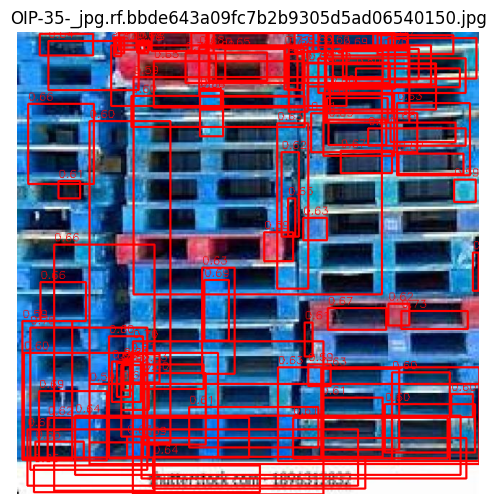

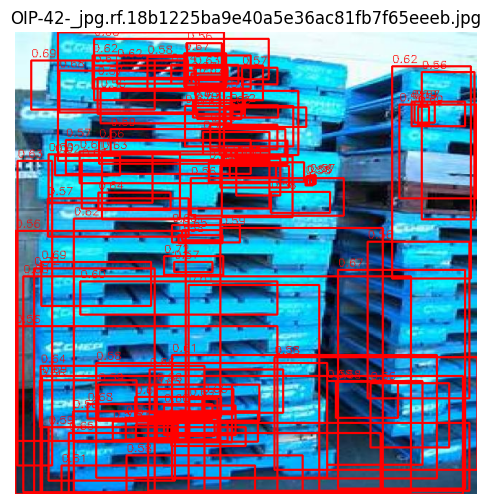

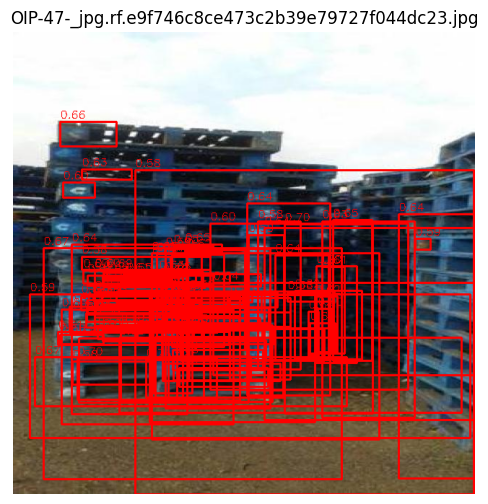

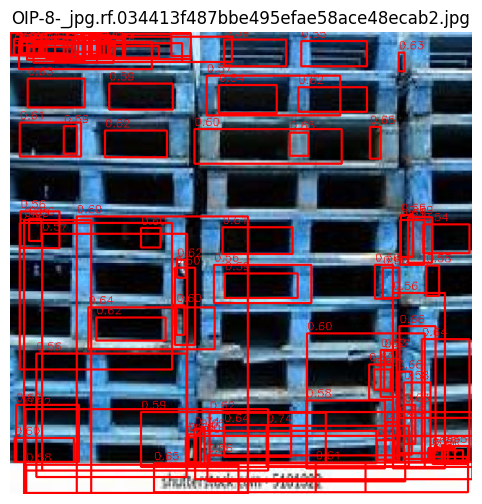

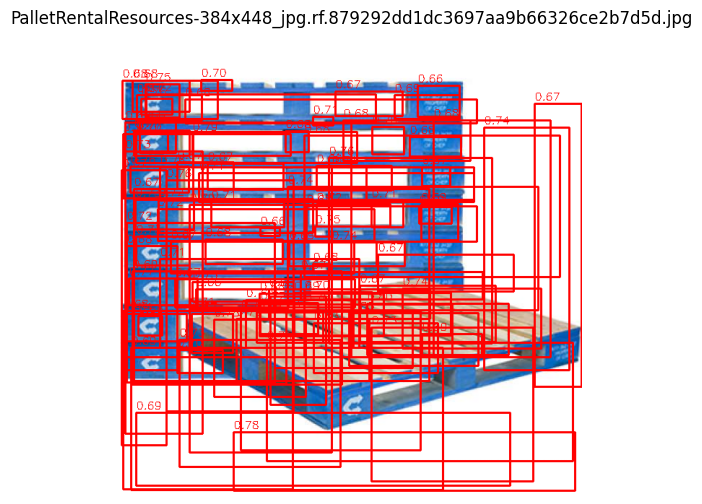

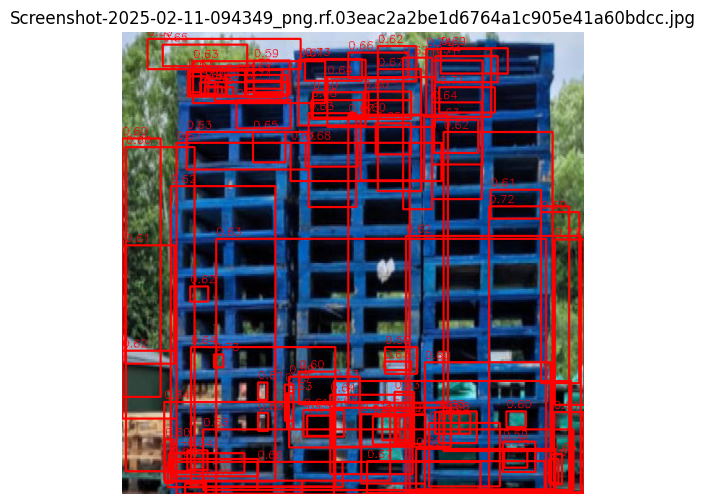

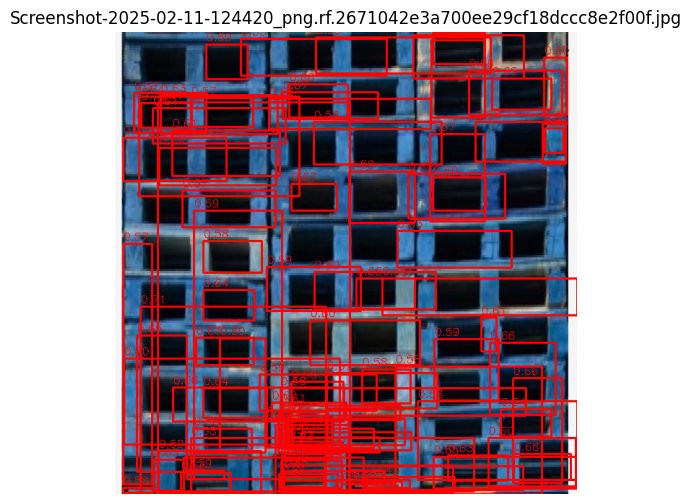

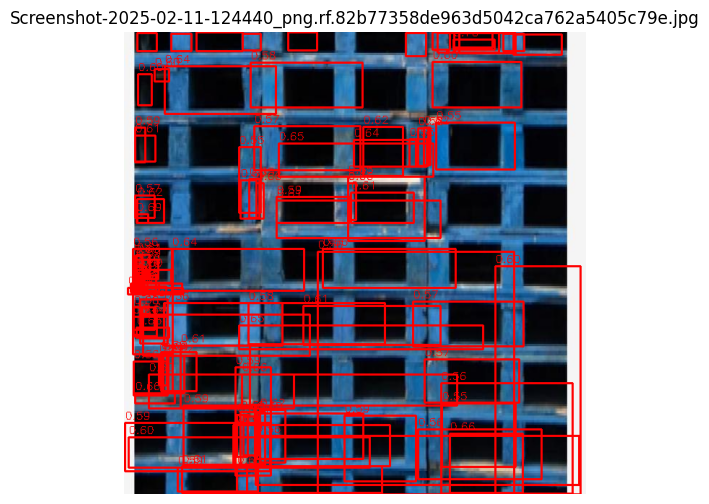

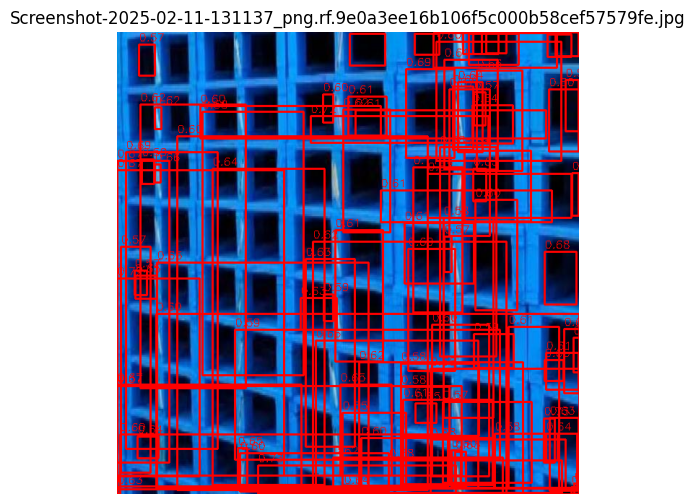

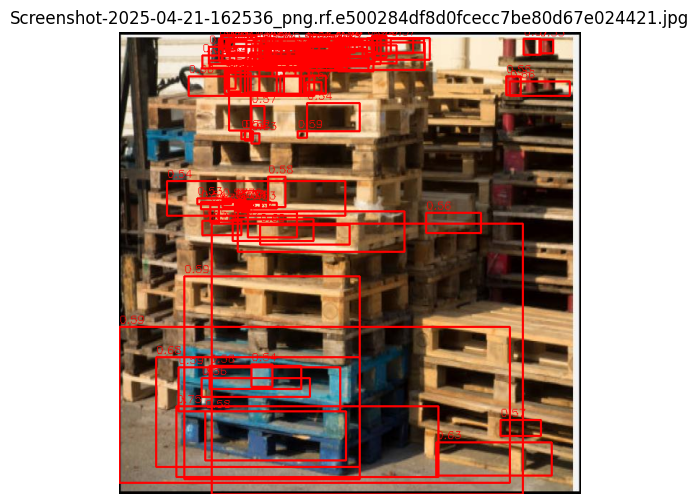

In [24]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
import numpy as np

# Load model
model.eval()
model.load_state_dict(torch.load("/kaggle/working/faster_rcnn_model.pth"))
model.to(device)

# Transform for test
transform = T.Compose([T.ToTensor()])

# Test directory
test_images_dir = "/kaggle/working/combined_data/test/images"
test_files = sorted(os.listdir(test_images_dir))[:10]  # check on 10 samples

# Inference and visualization
for file in test_files:
    img_path = os.path.join(test_images_dir, file)
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).to(device)

    with torch.no_grad():
        prediction = model([input_tensor])[0]

    boxes = prediction['boxes'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()
    threshold = 0.5

    # Draw boxes
    img_np = np.array(image).copy()
    for box, score in zip(boxes, scores):
        if score < threshold:
            continue
        x1, y1, x2, y2 = map(int, box)
        img_np = cv2.rectangle(img_np, (x1, y1), (x2, y2), (255, 0, 0), 2)
        img_np = cv2.putText(img_np, f"{score:.2f}", (x1, y1 - 5),
                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Show result
    plt.figure(figsize=(8, 6))
    plt.imshow(img_np)
    plt.title(file)
    plt.axis('off')
    plt.show()


In [28]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os
import json
import numpy as np
from PIL import Image
from tqdm import tqdm

# ✅ 1. Set paths
val_images_dir = "/kaggle/working/combined_data/valid/images"   # Your validation image folder
val_ann_path = "/kaggle/working/combined_data/valid/annotations.json"  # COCO-style annotation file

# ✅ 2. Load COCO-style annotations
coco_gt = COCO(val_ann_path)

# ✅ 3. Map image names to image IDs
image_id_map = {}
for img in coco_gt.dataset["images"]:
    image_id_map[img["file_name"]] = img["id"]

# ✅ 4. Load model
model = fasterrcnn_resnet50_fpn(pretrained=False)
num_classes = 2  # 1 class + background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
model.load_state_dict(torch.load("/kaggle/working/faster_rcnn_model.pth"))
model.eval().cuda()

# ✅ 5. Prepare transform and results list
results = []

# ✅ 6. Run inference on validation images
image_files = os.listdir(val_images_dir)

for file in tqdm(image_files, desc="Running inference"):
    if not file.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(val_images_dir, file)
    img = Image.open(img_path).convert("RGB")
    img_tensor = F.to_tensor(img).cuda()

    with torch.no_grad():
        prediction = model([img_tensor])[0]

    boxes = prediction["boxes"].cpu().numpy()
    scores = prediction["scores"].cpu().numpy()
    labels = prediction["labels"].cpu().numpy()

    if file not in image_id_map:
        print(f"Skipping {file}: not in COCO annotations")
        continue

    image_id = image_id_map[file]

    for box, score, label in zip(boxes, scores, labels):
        if score < 0.5:  # optional threshold
            continue
        x_min, y_min, x_max, y_max = box
        width, height = x_max - x_min, y_max - y_min

        results.append({
            "image_id": int(image_id),
            "category_id": int(label),
            "bbox": [float(x_min), float(y_min), float(width), float(height)],
            "score": float(score)
        })

# ✅ 7. Save predictions
pred_path = "/kaggle/working/predictions.json"
with open(pred_path, "w") as f:
    json.dump(results, f)

# ✅ 8. Load predictions into COCO format
coco_dt = coco_gt.loadRes(pred_path)

# ✅ 9. Evaluate
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_31/3301958212.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

Skipping wooden-pallets-stacks-cargo-shipping-60794370_jpg.rf.61ff1d9c233784778d4e9d13a3ec53bc.jpg: not in COCO annotations


Running inference:   6%|▋         | 14/220 [00:00<00:11, 17.92it/s]

Skipping Screenshot-2025-04-24-123643_png.rf.aa195ff0bc9441a2b266589165150be4.jpg: not in COCO annotations


Running inference:  28%|██▊       | 62/220 [00:03<00:08, 17.99it/s]

Skipping stacked-pallets-symbol-photo-freight-transport-logistics-46881805_jpg.rf.c36ebe3aa9438919309e4c1bcea056e7.jpg: not in COCO annotations


Running inference:  32%|███▏      | 70/220 [00:03<00:08, 17.41it/s]

Skipping warehouse-many-pallets-ready-use-front-view-wooden-pallets-stacked-rows-pallets-located-middle-172394588-1-_jpg.rf.ffbd8ca064b79ff6bcc98bf1100fa487.jpg: not in COCO annotations
Skipping wood-working-pallets-stacked-background-home-75212616_jpg.rf.42eb8c9c8cc7e22de51f94e685e5e6a4.jpg: not in COCO annotations


Running inference:  41%|████      | 90/220 [00:05<00:07, 17.93it/s]

Skipping Screenshot-2025-04-21-163455_png.rf.123024b2ce35141b9bd5debd90d46932.jpg: not in COCO annotations


Running inference:  47%|████▋     | 104/220 [00:05<00:06, 18.05it/s]

Skipping wooden-pallets-various-projects-62446647_jpg.rf.7acd25f0ceaea36bad04d81df5dc19ff.jpg: not in COCO annotations


Running inference:  50%|█████     | 110/220 [00:06<00:06, 17.87it/s]

Skipping stacked-wooden-pallets-industrial-used-transporting-heavy-goods-45606083_jpg.rf.16dd9551388174a398da6fbe720e98e0.jpg: not in COCO annotations


Running inference:  58%|█████▊    | 128/220 [00:07<00:05, 18.15it/s]

Skipping wooden-pallets-warehouse-front-view-35713718-2-_jpg.rf.c8328cd3d23944cd9edcc6b7c1abf25d.jpg: not in COCO annotations


Running inference:  65%|██████▌   | 144/220 [00:08<00:04, 18.01it/s]

Skipping wooden-pallets-stack-stacked-distribution-warehouse-196525092_jpg.rf.8b1bfff22a0275b94df33c1af6e2eb94.jpg: not in COCO annotations


Running inference:  69%|██████▉   | 152/220 [00:08<00:03, 18.10it/s]

Skipping wooden-color-pallet-many-cargo-pallets-stored-pile-near-warehouse-area-industrial-area-palma-de-mallorca-66974341_jpg.rf.061a776abd5aaeb9e22a48d359794778.jpg: not in COCO annotations
Skipping wooden-pallets-stacked-top-each-other-several-rows-warehouse-212717835-1-_jpg.rf.cb61cf549d42d10911ae25b952730036.jpg: not in COCO annotations


Running inference:  75%|███████▍  | 164/220 [00:09<00:03, 18.07it/s]

Skipping stock-new-wooden-euro-pallets-transportation-company-39060878_jpg.rf.a63700c94c7a9bcb7ddda31109b75491.jpg: not in COCO annotations


Running inference:  76%|███████▋  | 168/220 [00:09<00:02, 18.16it/s]

Skipping Screenshot-2025-04-24-105518_png.rf.8768249cb8ffea6933e9c713c5e1e568.jpg: not in COCO annotations


Running inference:  80%|████████  | 176/220 [00:09<00:02, 18.11it/s]

Skipping wooden-pallets-9095013_jpg.rf.487aa600ce8b3aa0f50f5362028360d7.jpg: not in COCO annotations


Running inference:  83%|████████▎ | 182/220 [00:10<00:02, 18.17it/s]

Skipping wooden-euro-pallets-stacked-big-industrial-storehouse-wooden-euro-pallets-stacked-big-industrial-storehouse-173332482_jpg.rf.4624b6d2c2eea10949abb4d198b48b09.jpg: not in COCO annotations


Running inference:  85%|████████▌ | 188/220 [00:10<00:01, 18.23it/s]

Skipping wooden-pallets-9095013_jpg.rf.05cf1ae209aebe0cbf8ee3f5dcc19f1b.jpg: not in COCO annotations


Running inference:  89%|████████▉ | 196/220 [00:10<00:01, 18.02it/s]

Skipping Screenshot-2025-04-24-105618_png.rf.0232488313f1e11af6cbf0f182417efb.jpg: not in COCO annotations


Running inference:  94%|█████████▎| 206/220 [00:11<00:00, 18.14it/s]

Skipping Screenshot-2025-04-24-105343_png.rf.772220f936a39561768f8d54a10b3772.jpg: not in COCO annotations


Running inference:  98%|█████████▊| 216/220 [00:11<00:00, 18.22it/s]

Skipping wooden-pallets-stacks-cargo-shipping-60794370_jpg.rf.de546d884e189d1c002f3c7bfbe3aa6e.jpg: not in COCO annotations


Running inference: 100%|██████████| 220/220 [00:12<00:00, 18.01it/s]


Loading and preparing results...
DONE (t=0.62s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=10.06s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1